# ISYE6501 Homework 4

Done By: Joel Quek

## Question 7.1

Describe a situation or problem from your job, everyday life, current events, etc., for which exponential smoothing would be appropriate. What data would you need? Would you expect the value of $\alpha\$ (the first smoothing parameter) to be closer to 0 or 1, and why?

As an educator, I had to follow up on students who contracted covid-19 after routine weekly tests. I found myself having to play catch-up to them constantly. Instead of being reactive, I could have been predictive, and modelled the spikes and throughs of covid incidences using time-series analysis. An example would be the graph below:

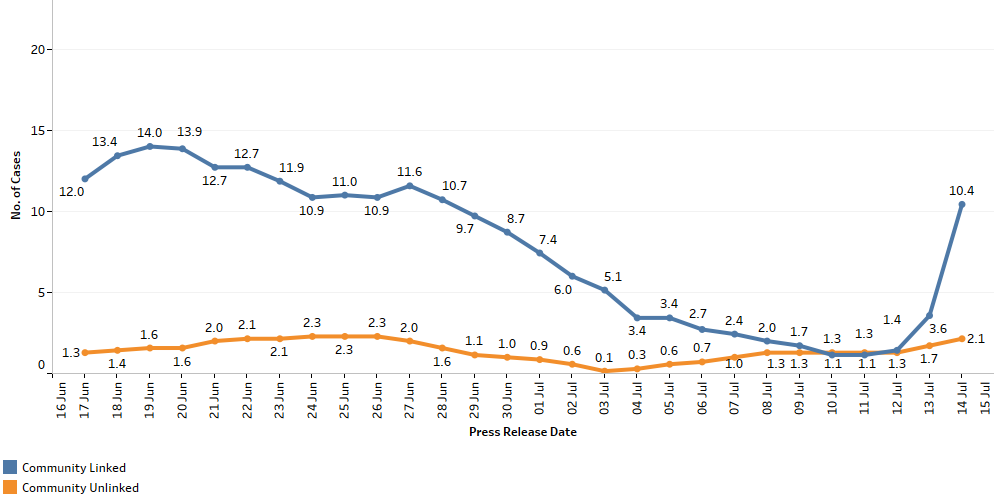

Source: https://www.moh.gov.sg/news-highlights/details/update-on-local-covid-19-situation-%2814-july%29

Data from other schools could be shared and aggregated to perform a cluster sampling of the country's incidences. 

I would choose a small $\alpha$ value because I wish to give more weight to historic data. The reason is that those who already contracted the virus are less likely to contract it again.

---

## Question 7.2

Using the 20 years of daily high temperature data for Atlanta (July through October) from Question 6.2 (file temps.txt), build and use an **exponential smoothing model** to help **make a judgment of whether the unofficial end of summer has gotten later** over the 20 years.  (Part of the point of this assignment is for you to think about how you might use exponential smoothing to answer this question. Feel free to combine it with other models if you’d like to. There’s certainly more than one reasonable approach.) 

Note: in R, you can use either HoltWinters (simpler to use) or the smooth package’s $es$ function (harder to use, but more general).  If you use $es$, the Holt-Winters model uses model=”AAM” in the function call (the first and second constants are used “A”dditively, and the third (seasonality) is used “M”ultiplicatively; the documentation doesn’t make that clear). 


### Libraries

In [13]:
install.packages("HoltWinters")
install.packages("forecast")

Installing package into 'C:/Users/redoc/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

Warning message:
"package 'HoltWinters' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"


In [1]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Downloading HoltWinters created some error, but strangely the library works.

### Reading the Data

In [2]:
temps<-read.table("C:\\Users\\redoc\\OneDrive\\Desktop\\GTx Masters OMSA\\GTx - ISYE6501x Introduction to Analytics Modelling\\Week 4\\temps.txt", header=TRUE)

In [3]:
head(temps)

,DAY,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,⋯,X2006,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1-Jul,98,86,91,84,89,84,90,73,82,⋯,93,95,85,95,87,92,105,82,90,85
2,2-Jul,97,90,88,82,91,87,90,81,81,⋯,93,85,87,90,84,94,93,85,93,87
3,3-Jul,97,93,91,87,93,87,87,87,86,⋯,93,82,91,89,83,95,99,76,87,79
4,4-Jul,90,91,91,88,95,84,89,86,88,⋯,91,86,90,91,85,92,98,77,84,85
5,5-Jul,89,84,91,90,96,86,93,80,90,⋯,90,88,88,80,88,90,100,83,86,84
6,6-Jul,93,84,89,91,96,87,93,84,90,⋯,81,87,82,87,89,90,98,83,87,84


In [4]:
summary(temps)

     DAY                X1996           X1997           X1998      
 Length:123         Min.   :60.00   Min.   :55.00   Min.   :63.00  
 Class :character   1st Qu.:79.00   1st Qu.:78.50   1st Qu.:79.50  
 Mode  :character   Median :84.00   Median :84.00   Median :86.00  
                    Mean   :83.72   Mean   :81.67   Mean   :84.26  
                    3rd Qu.:90.00   3rd Qu.:88.50   3rd Qu.:89.00  
                    Max.   :99.00   Max.   :95.00   Max.   :95.00  
     X1999           X2000            X2001           X2002      
 Min.   :57.00   Min.   : 55.00   Min.   :51.00   Min.   :57.00  
 1st Qu.:75.00   1st Qu.: 77.00   1st Qu.:78.00   1st Qu.:78.00  
 Median :86.00   Median : 86.00   Median :84.00   Median :87.00  
 Mean   :83.36   Mean   : 84.03   Mean   :81.55   Mean   :83.59  
 3rd Qu.:91.00   3rd Qu.: 91.00   3rd Qu.:87.00   3rd Qu.:91.00  
 Max.   :99.00   Max.   :101.00   Max.   :93.00   Max.   :97.00  
     X2003           X2004           X2005           X2006    

---

### Exponential Smoothing Models

##### Source 1
https://orangematter.solarwinds.com/2019/12/15/holt-winters-forecasting-simplified/#:~:text=What%20Is%20the%20Holt%2DWinters,cyclical%20repeating%20pattern%20(seasonality).


---

##### 1. Simple Exponential Weighted Moving Average (Only Value/Level)

$s_t = \alpha x_t + (1 - \alpha)s_{t-1}$

##### 2. Holt's (Double) Exponential Smoothing (Value and Trend)

Charles Holt modified the simple exponential smoothing model to account for a linear trend. 

**Smoothed Values (Value/Level)**<br>
$s_t = \alpha x_t + (1 - \alpha)(s_{t-1}+b_{t-1})$

**Slope (Trend)**<br>
$b_t = \beta(s_t-s_{t-1})+(1-\beta)b_{t-1}$

**m-step-ahead forecast**<br>
$F_{t+m}=s_t+mb_t$

##### 3. Holt-Winters Triple Exponential Smoothing (Value/Level, Trend and Seasonality)
Source: https://towardsdatascience.com/time-series-forecasting-in-r-with-holt-winters-16ef9ebdb6c0

alpha: the “base/level value”. Higher alpha puts more weight on the most recent observations.

beta: the “trend value”. Higher beta means the trend slope is more dependent on recent trend slopes.

gamma: the “seasonal component”. Higher gamma puts more weighting on the most recent seasonal cycles.

---

##### Source 2
https://towardsdatascience.com/time-series-forecasting-in-r-with-holt-winters-16ef9ebdb6c0

I referred closely to this website's example and adapted it to the *temps* dataset.

##### Step 1: Converting to a Time Series

In [5]:
time_series = as.vector(unlist( temps[ ,2:21] ) ) # converting the dataframe into a vector
time_series = ts(time_series, start =1996, frequency =123) 
# 123 = no. of days in Jul-Oct  
# look at length from summary(temps) above to see why 123 is used

In [6]:
time_series

A Time Series:
   [1]  98  97  97  90  89  93  93  91  93  93  90  91  93  93  82  91  96  95
  [19]  96  99  91  95  91  93  84  84  82  79  90  91  87  86  90  84  91  93
  [37]  88  91  84  90  89  88  86  84  86  89  90  91  91  90  89  90  91  91
  [55]  91  84  88  84  86  88  84  82  80  73  87  84  87  89  89  89  91  84
  [73]  86  88  78  79  86  82  82  78  79  79  78  81  84  84  87  84  79  75
  [91]  72  64  66  72  84  70  66  64  60  78  70  72  69  69  73  79  81  80
 [109]  82  66  63  68  79  81  69  73  73  75  75  81  82  82  81  86  90  93
 [127]  91  84  84  75  87  84  87  84  88  86  90  91  91  89  89  89  90  89
 [145]  84  87  88  89  89  91  91  89  88  72  80  84  88  89  88  84  84  80
 [163]  73  80  86  88  88  87  88  91  91  89  89  88  82  79  81  82  84  87
 [181]  90  90  91  91  88  88  91  93  81  81  82  86  88  84  80  82  86  87
 [199]  87  88  88  90  88  91  95  89  70  80  82  66  70  64  68  77  86  75
 [217]  73  75  78  81  82  82  82  80  82  82  79  80  68  63  57  66  64  69
 [235]  70  70  62  63  62  75  71  57  55  64  66  60  91  88  91  91  91  89
 [253]  93  95  95  91  91  86  88  87  91  87  90  91  95  91  91  89  91  91
 [271]  86  88  80  88  89  90  86  86  82  84  86  90  89  89  86  82  87  88
 [289]  84  86  80  82  86  84  87  90  79  84  87  87  88  90  91  89  90  93
 [307]  93  91  87  84  77  90  91  89  90  89  79  78  81  84  89  87  87  88
 [325]  87  82  80  82  82  88  84  81  82  84  87  80  75  75  86  78  77  82
 [343]  82  73  82  69  72  73  78  78  78  75  79  78  77  78  82  75  73  63
 [361]  63  72  75  79  79  79  78  82  79  84  82  87  88  90  91  82  86  87
 [379]  87  82  77  73  81  81  86  82  87  88  90  90  91  93  93  91  93  93
 [397]  93  93  97  99  96  93  88  89  91  93  93  93  91  90  96  98  97  98
 [415]  93  93  96  98  98  89  91  91  90  80  82  89  88  90  91  91  84  88
 [433]  91  84  93  96  96  91  91  77  87  87  87  86  87  89  81  81  82  79
 [451]  68  79  72  75  78  81  82  78  80  77  71  73  75  84  71  73  71  73
 [469]  73  72  72  73  70  64  75  73  77  80  71  66  60  64  73  57  59  64
 [487]  69  75  73  72  75  75  89  91  93  95  96  96  96  91  96  99  96  93
 [505]  91  93  93  93  91  97 100  99  93  96  87  82  75  82  88  91  89  87
 [523]  86  86  81  84  88  91  91  91  91  96  95  89  89  89  89  94  97  99
 [541] 101 101  97  87  86  88  92  92  90  90  92  92  88  87  79  81  82  87
 [559]  81  66  66  75  80  82  84  86  87  86  80  75  73  73  84  87  77  73
 [577]  81  84  82  68  71  75  73  75  77  79  82  81  82  73  66  55  55  64
 [595]  71  73  75  75  77  80  80  80  73  73  75  79  75  75  78  75  78  80
 [613]  75  77  78  84  87  87  84  86  87  87  89  91  87  90  90  86  82  82
 [631]  84  87  88  90  87  84  87  90  84  82  88  90  84  89  89  87  84  84
 [649]  84  86  88  84  86  88  87  88  86  86  81  87  84  90  91  91  87  86
 [667]  88  90  88  93  90  91  91  81  86  81  82  80  75  73  81  90  88  87
 [685]  86  86  89  87  84  84  86  77  77  81  81  82  84  86  87  88  69  66
 [703]  72  75  78  71  71  75  80  81  80  79  70  68  79  66  73  75  78  78
 [721]  75  75  62  60  64  71  75  79  80  81  79  73  64  51  55  63  72  71
 [739]  90  90  87  89  93  93  89  89  90  91  84  77  82  88  91  93  93  93
 [757]  93  91  95  91  89  87  84  86  89  91  91  88  90  93  91  91  91  93
 [775]  97  87  87  86  88  89  91  91  89  88  90  91  93  91  93  93  91  95
 [793]  93  91  88  84  82  82  78  77  84  84  89  95  93  91  88  87  91  95
 [811]  95  90  75  78  91  88  86  81  80  86  84  77  82  73  69  75  75  79
 [829]  73  79  82  84  84  82  87  86  80  71  66  70  78  84  79  68  57  66
 [847]  64  68  71  73  71  64  59  68  60  68  69  75  75  68  60  73  81  87
 [865]  86  80  84  87  90  89  84  84  86  87  84  86  88  88  88  88  88  89
 [883]  86  81  82  84  87  87  89  88  84  88  84  84  84  82  84  82  84  84
 [901]  86  87  84  81  87  89  90 

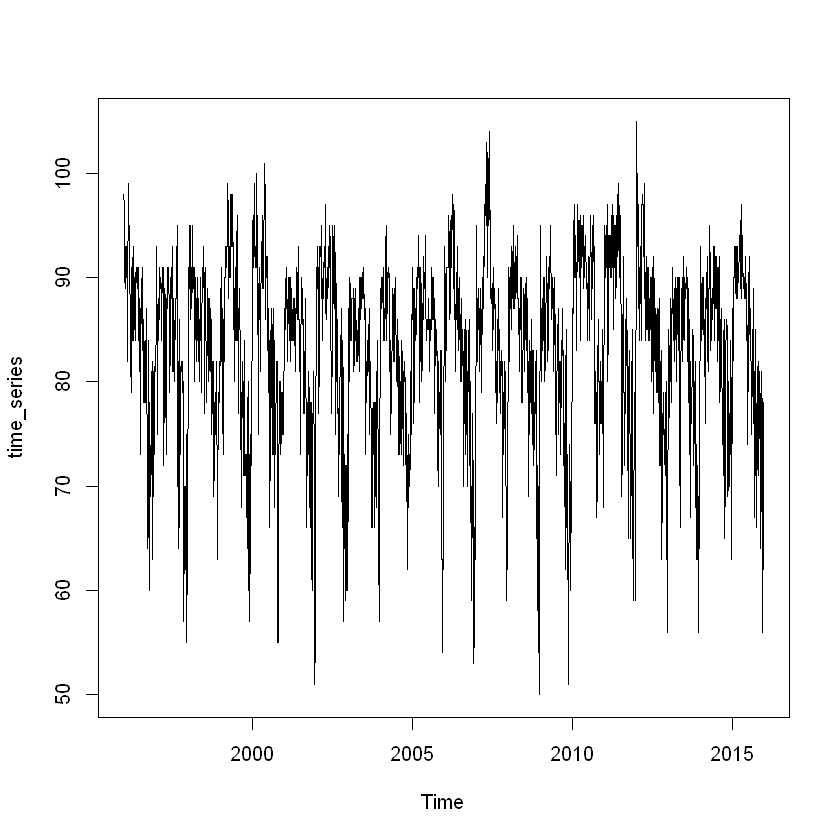

In [7]:
plot.ts(time_series )

##### Step 2: Decomposing

In [9]:
components_time_series <- decompose(time_series)
components_time_series

$x
Time Series:
Start = c(1996, 1) 
End = c(2015, 123) 
Frequency = 123 
   [1]  98  97  97  90  89  93  93  91  93  93  90  91  93  93  82  91  96  95
  [19]  96  99  91  95  91  93  84  84  82  79  90  91  87  86  90  84  91  93
  [37]  88  91  84  90  89  88  86  84  86  89  90  91  91  90  89  90  91  91
  [55]  91  84  88  84  86  88  84  82  80  73  87  84  87  89  89  89  91  84
  [73]  86  88  78  79  86  82  82  78  79  79  78  81  84  84  87  84  79  75
  [91]  72  64  66  72  84  70  66  64  60  78  70  72  69  69  73  79  81  80
 [109]  82  66  63  68  79  81  69  73  73  75  75  81  82  82  81  86  90  93
 [127]  91  84  84  75  87  84  87  84  88  86  90  91  91  89  89  89  90  89
 [145]  84  87  88  89  89  91  91  89  88  72  80  84  88  89  88  84  84  80
 [163]  73  80  86  88  88  87  88  91  91  89  89  88  82  79  81  82  84  87
 [181]  90  90  91  91  88  88  91  93  81  81  82  86  88  84  80  82  86  87
 [199]  87  88  88  90  88  91  95  89  70  80  82  66  70

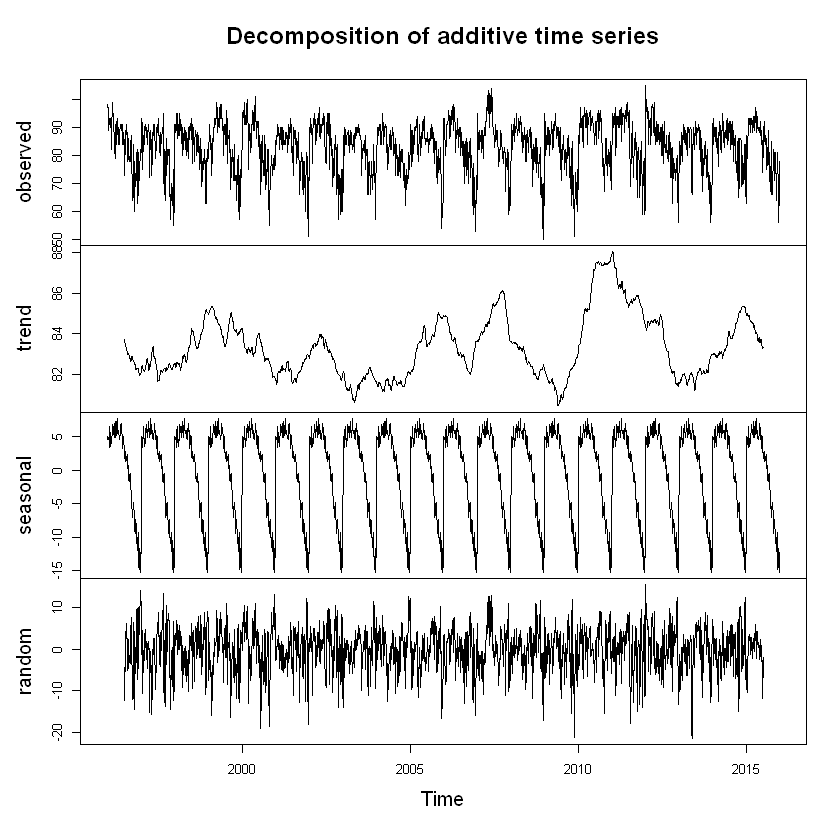

In [10]:
plot(components_time_series)

From the website, 3 main components that make up the time series:

- trend: the long-term trends in the data
- seasonal: the repeated seasonal signal adder
- random: the “left-over” components that aren’t expected from the seasonality or trend components.

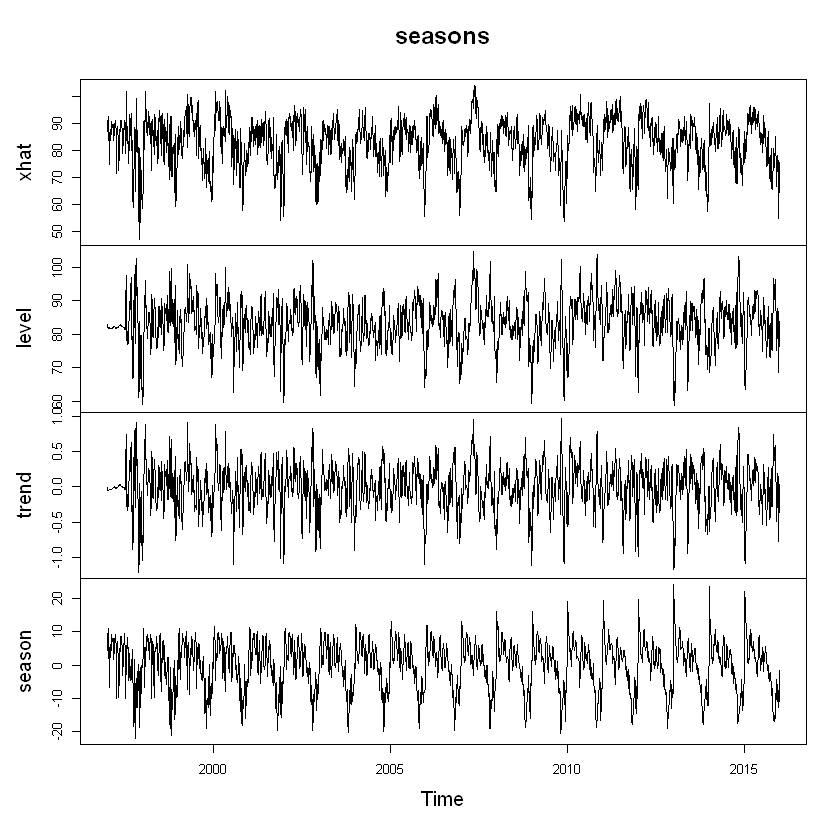

In [11]:
# COME BACK TO THIS (KIV)
seasons = HW_model$fitted
plot(seasons)

##### Step 3: Fitting with Holt-Winters

Also, from the website:

- alpha: the “base value”. Higher alpha puts more weight on the most **recent observations.**

- beta: the “trend value”. Higher beta means the trend slope is more **dependent on recent trend slopes.**

- gamma: the “seasonal component”. Higher gamma puts more weighting on the **most recent seasonal cycles.**

**Holt Winters 1**

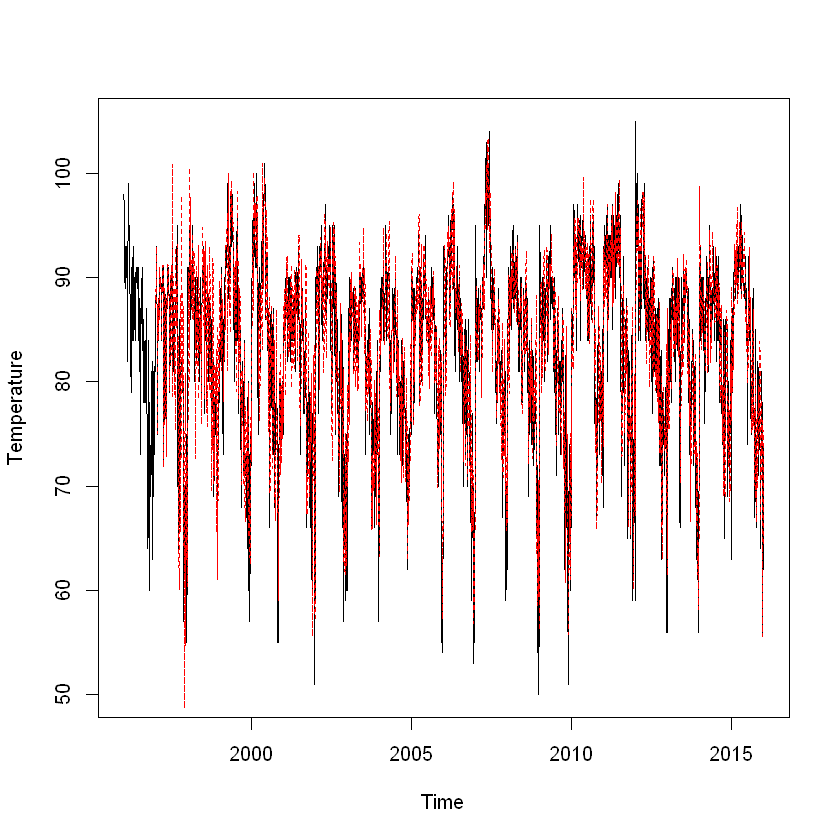

In [55]:
HW1 <- HoltWinters(time_series)
# Custom HoltWinters fitting
HW2 <- HoltWinters(time_series, alpha=0.2, beta=0.1, gamma=0.1)
#Visually evaluate the fits
plot(time_series, ylab="Temperature", xlim=c(1996,2016))#{width=200%}
#dev.new(width=100, height=50, unit="px")
lines(HW1$fitted[,1], lty=2, col="red")
#lines(HW2$fitted[,1], lty=2, col="red")

**Holt Winters 2**

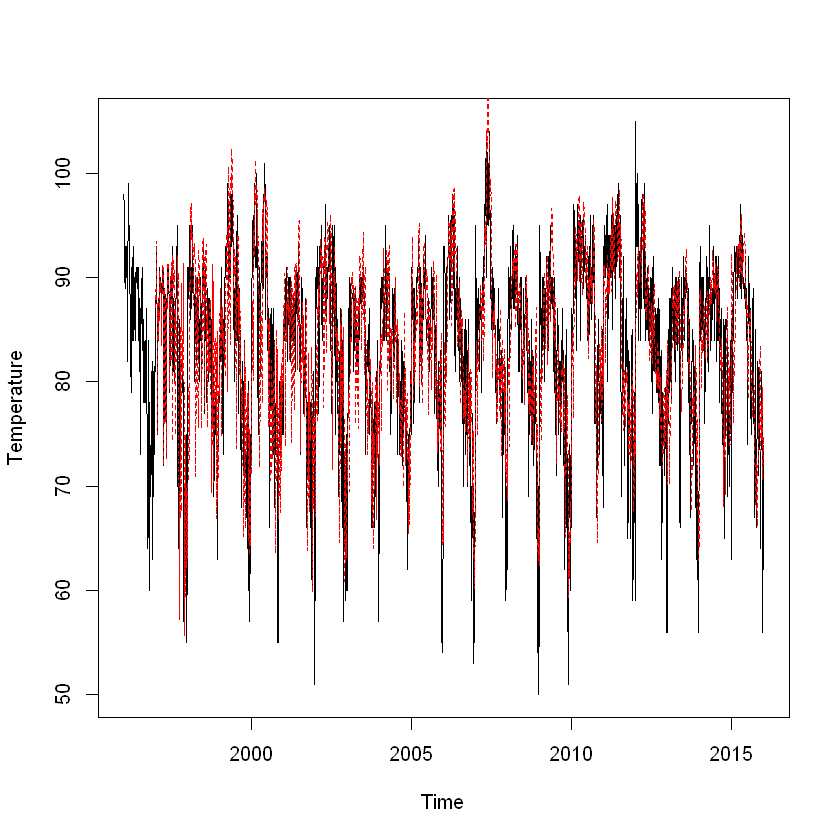

In [44]:
plot(time_series, ylab="Temperature", xlim=c(1996,2016))
#lines(HW1$fitted[,1], lty=2, col="blue")
lines(HW2$fitted[,1], lty=2, col="red")

##### Step 4: Predictions

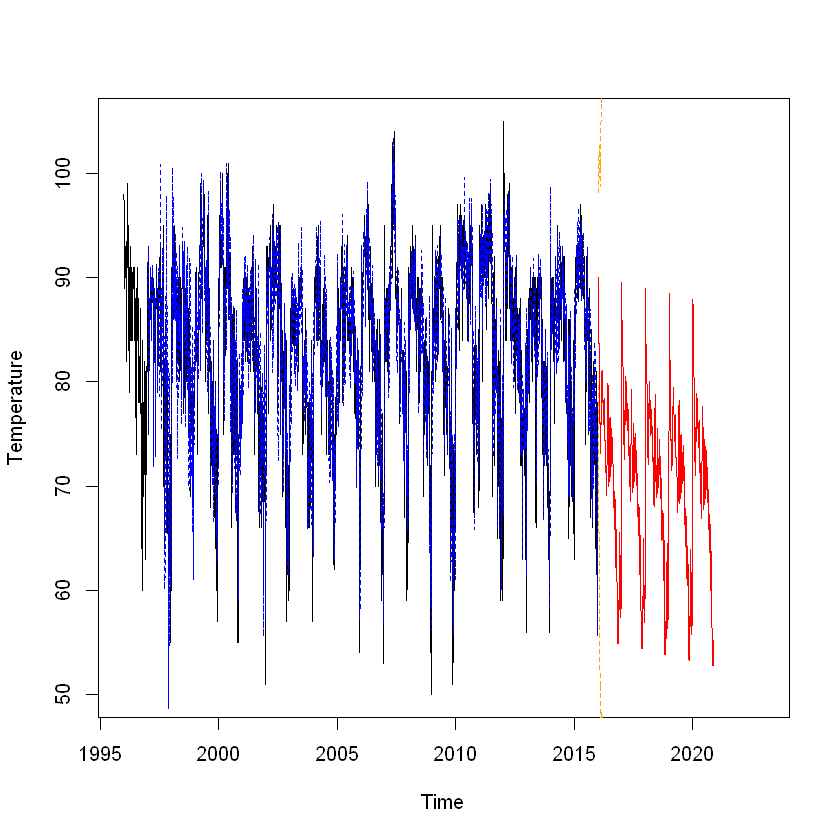

In [37]:
HW1.pred <- predict(HW1, 600, prediction.interval = TRUE, level=0.95)
#Visually evaluate the prediction
plot(time_series, ylab="Temperature", xlim=c(1996,2023))
lines(HW1$fitted[,1], lty=2, col="blue")
lines(HW1.pred[,1], col="red")
lines(HW1.pred[,2], lty=2, col="orange")
lines(HW1.pred[,3], lty=2, col="orange")

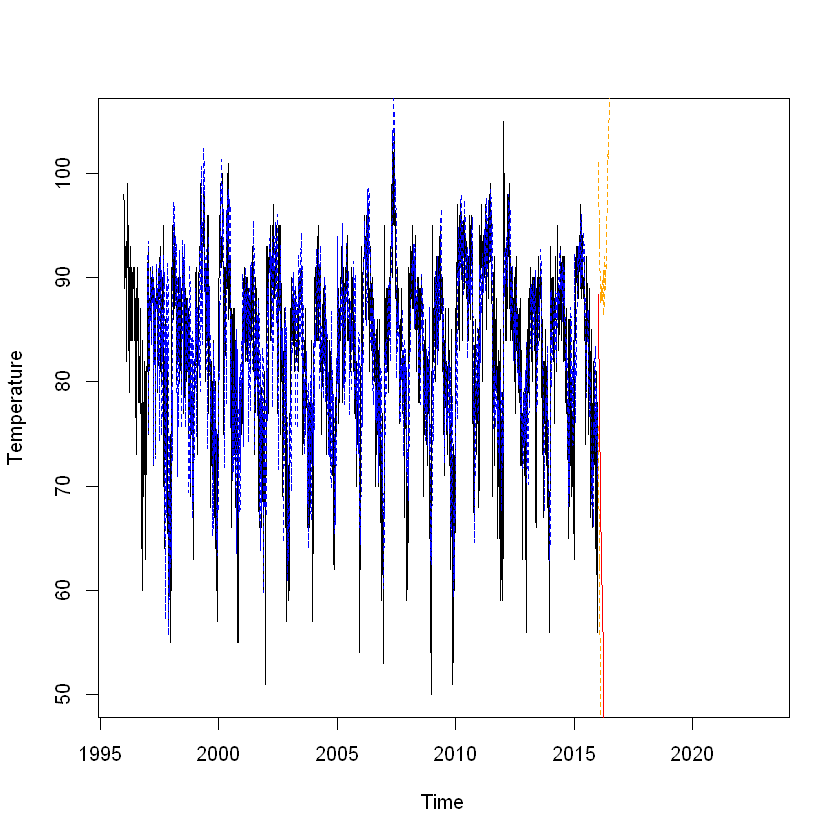

In [38]:
HW2.pred <- predict(HW2, 600, prediction.interval = TRUE, level=0.95)
#Visually evaluate the prediction
plot(time_series, ylab="Temperature", xlim=c(1996,2023))
lines(HW2$fitted[,1], lty=2, col="blue")
lines(HW2.pred[,1], col="red")
lines(HW2.pred[,2], lty=2, col="orange")
lines(HW2.pred[,3], lty=2, col="orange")

The default model (HW1) gives a better forward prediction then HW2. HW1 suggests that the temperature will be decreasing over the years.

##### Step 5: Seasonality Tuning

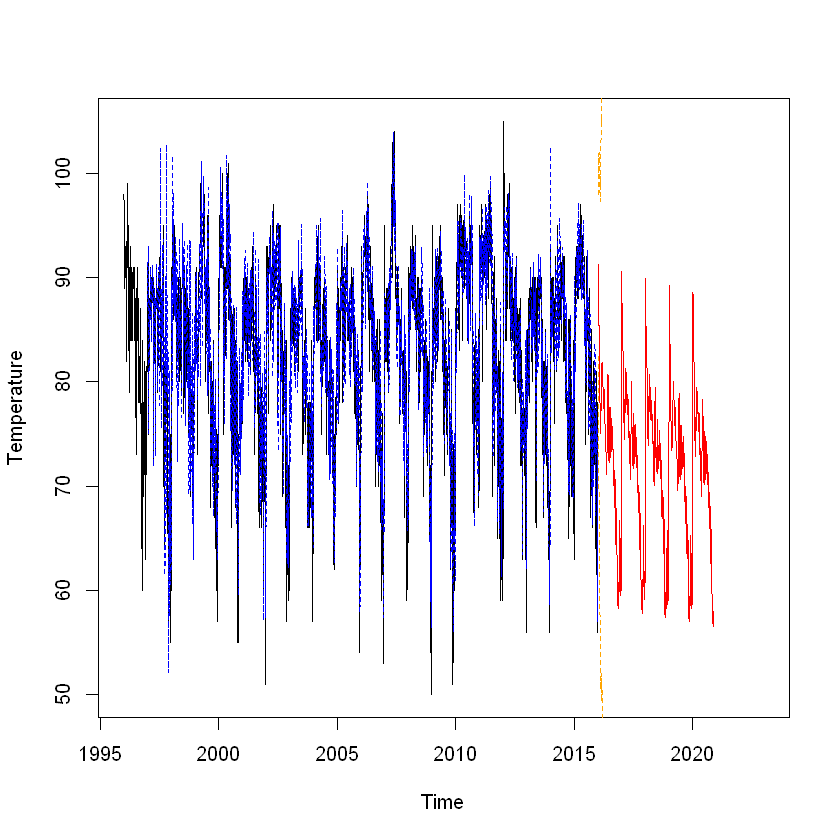

In [39]:
HW3 <- HoltWinters(time_series, seasonal = "multiplicative")
HW3.pred <- predict(HW3, 600, prediction.interval = TRUE, level=0.95)
plot(time_series, ylab="Temperature", xlim=c(1996,2023))
lines(HW3$fitted[,1], lty=2, col="blue")
lines(HW3.pred[,1], col="red")
lines(HW3.pred[,2], lty=2, col="orange")
lines(HW3.pred[,3], lty=2, col="orange")

Using a multiplicative seasonality model instead of an additive seasonality model, we see that HW3 (multiplicative) has predictions in line with HW1 (additive).

##### Step 6: Using 'Forecasts' Library

From the website:
*forecast* is a wrapper for predict that allows for more confidence intervals, makes plotting easier, and gives us tools to evaluate the quality of our predictions. 

Using our HW1 Holt-Winters fit from before, we can use forecast to make new predictions and include both 80% and 95% confidence intervals. 

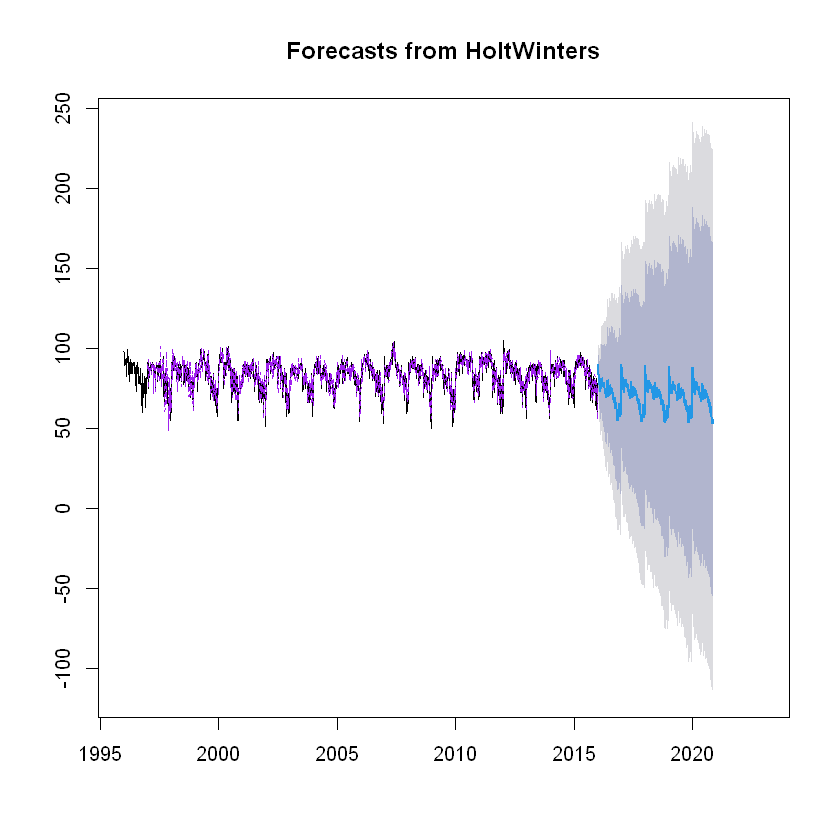

In [40]:
library(forecast)
HW1_for <- forecast(HW1, h=600, level=c(80,95))
#visualize our predictions:
plot(HW1_for, xlim=c(1996, 2023))
lines(HW1_for$fitted, lty=2, col="purple")

Using the forecast library, I can see that the conclusion is similar to using the Holt Winters library, where both predicts that the average temperature is dropping over time.

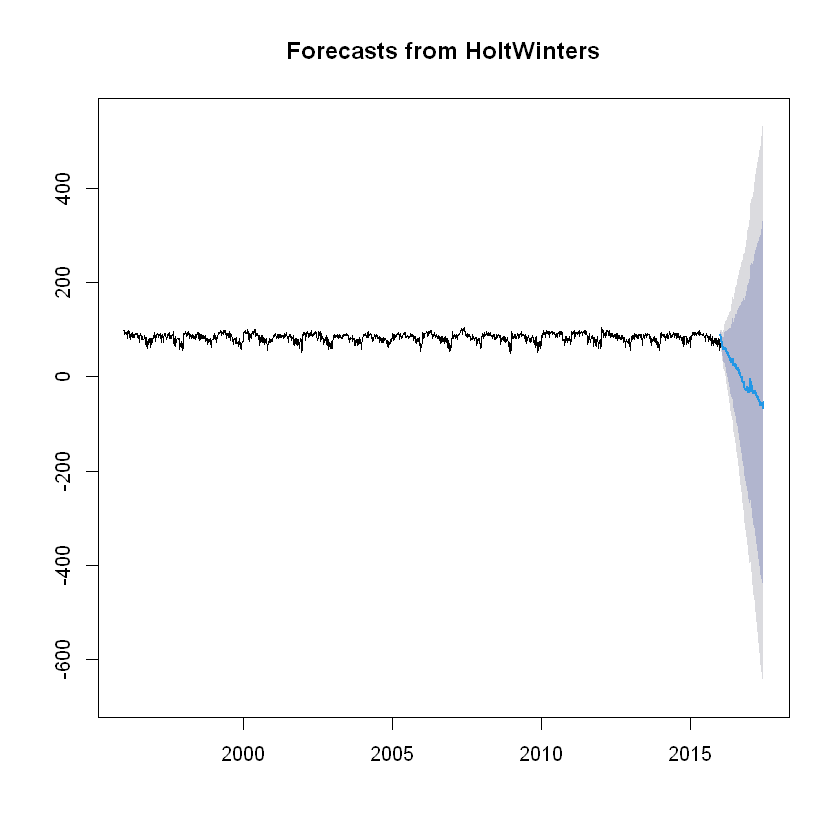

In [14]:
# COME BACK TO THIS (KIV)
temp_forecast=predict( HW_model, n.ahead =100, prediction.interval =TRUE)
plot(forecast( HW_model, h =180))

##### Step 7: Forecast Evaluation


	Box-Ljung test

data:  HW1_for$residuals
X-squared = 301.17, df = 20, p-value < 2.2e-16


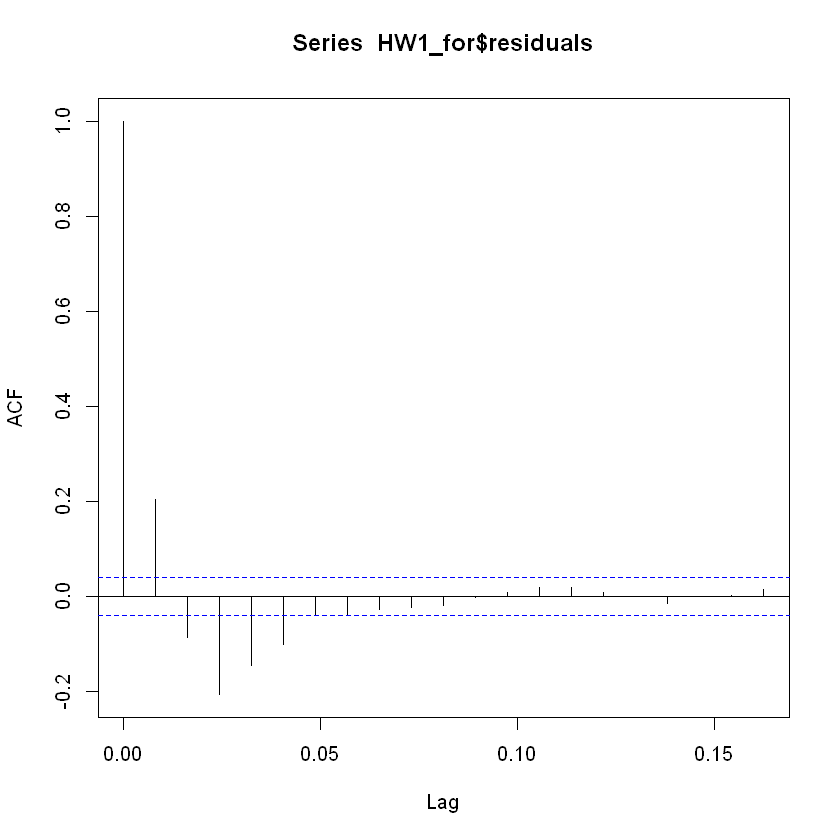

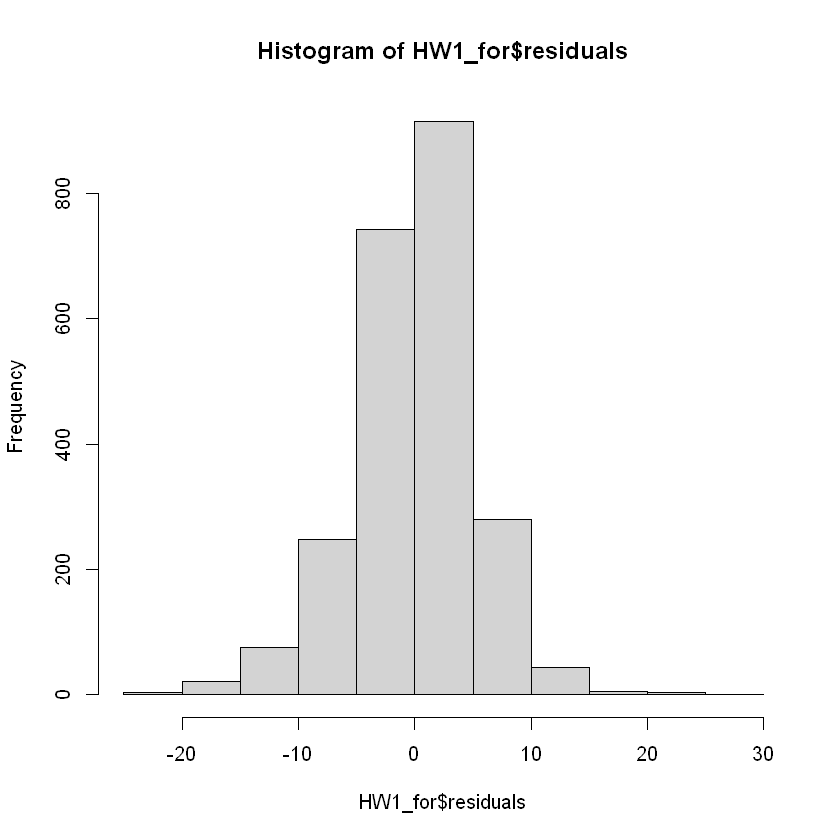

In [18]:
acf(HW1_for$residuals, lag.max=20, na.action=na.pass)
Box.test(HW1_for$residuals, lag=20, type="Ljung-Box")
hist(HW1_for$residuals)

From the ACF chart we can see that most of the ACF bars are within the blue range bars, which show that the fit has not much lag in predictions. 

Also, the histogram of residuals are normally distributed which indicates that the model isn't biased in any direction.

---

##### Step 8: Conclusion

The models show that the temperatures are predicted to drop lower in the future years, which might suggest that the unofficial summer ends later. However, further investigation is suggested.

---